In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import urllib.request
from PIL import Image
import os
import cv2

In [33]:
book_ratings = pd.read_csv('./dataset/Ratings.csv')
book_lists = pd.read_csv('./dataset/Books.csv')
book_users = pd.read_csv('./dataset/Users.csv')

c:\Users\ASUS\Python38\lib\site-packages\IPython\core\interactiveshell.py:3398: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Exploratory Data Analysis

In [34]:
book_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [35]:
book_lists.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [36]:
book_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [37]:
book_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [38]:
book_lists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [39]:
book_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [40]:
# merge all files into one
data =  pd.merge(book_ratings, book_lists, on='ISBN', how="left")
data = pd.merge(data, book_users, on='User-ID', how='left')

In [41]:
data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",NaN
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149780 entries, 0 to 1149779
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1149780 non-null  int64  
 1   ISBN                 1149780 non-null  object 
 2   Book-Rating          1149780 non-null  int64  
 3   Book-Title           1031136 non-null  object 
 4   Book-Author          1031135 non-null  object 
 5   Year-Of-Publication  1031136 non-null  object 
 6   Publisher            1031134 non-null  object 
 7   Image-URL-S          1031136 non-null  object 
 8   Image-URL-M          1031136 non-null  object 
 9   Image-URL-L          1031132 non-null  object 
 10  Location             1149780 non-null  object 
 11  Age                  840288 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 114.0+ MB


In [43]:
#Check missing values
data.isnull().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title             118644
Book-Author            118645
Year-Of-Publication    118644
Publisher              118646
Image-URL-S            118644
Image-URL-M            118644
Image-URL-L            118648
Location                    0
Age                    309492
dtype: int64

In [44]:
data =  data.dropna()
data.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
Location               0
Age                    0
dtype: int64

In [45]:
#Remove duplicate values in book title
data = data.drop_duplicates('Book-Title')

In [46]:
data.shape

(205170, 12)

In [47]:
# due lack of RAM therefore I just use 10000 dataset
data = data[0:10000]
data.shape

(10000, 12)

In [48]:
data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0
5,276733,2080674722,0,Les Particules Elementaires,Michel Houellebecq,1998,Flammarion,http://images.amazon.com/images/P/2080674722.0...,http://images.amazon.com/images/P/2080674722.0...,http://images.amazon.com/images/P/2080674722.0...,"paris, n/a, france",37.0
16,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,"iowa city, iowa, usa",25.0


In [49]:
#get total_users
total_users = sum(np.unique(data['User-ID']))
print('Total users: {}'.format(total_users))

Total users: 113747591


In [50]:
#get highest and lowest value in 'Age' column
highest_user_age = max(data['Age'].value_counts().index)
lowest_user_age = min(data['Age'].value_counts().index)
print("highest user's age : {} and lowest user's age: {}".format(highest_user_age, lowest_user_age))

highest user's age : 104.0 and lowest user's age: 0.0


In [51]:
# check unique books title 
np.unique(data['Book-Title'])

array(["'48",
       '...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR',
       '007 El Mundo Nunca Es Suficiente', ..., 'stardust',
       'Â¡No bajes al sÃ³tano! (EscalofrÃ\xados No. 2)', 'Ã?Â?bermorgen.'],
      dtype=object)

rating scale: [ 0  1  2  3  4  5  6  7  8  9 10]

0     5623
10    1021
8     1001
7      723
9      720
6      365
5      359
4       94
3       50
2       26
1       18
Name: Book-Rating, dtype: int64


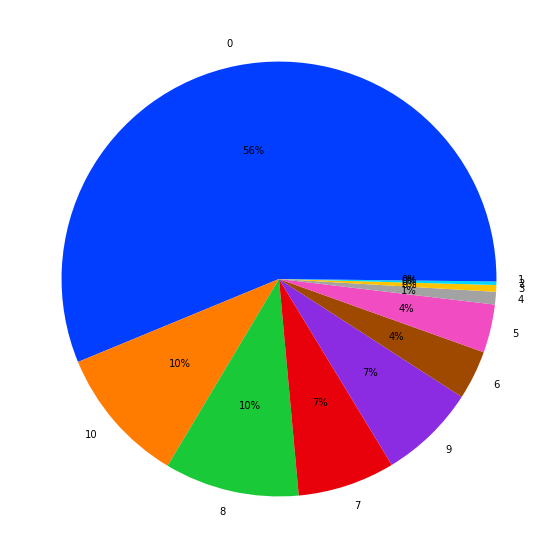

In [52]:
#check book rating
ratings = data['Book-Rating']
print('rating scale: {}\n'.format(np.unique(ratings)))

# we see that rating scale are from 0 to 10
# plot rating scales using pie chart

labels = ratings.value_counts().index
x = ratings.value_counts()

print(ratings.value_counts())
plt.figure(figsize=(15,10))
plt.pie(x, labels=labels, autopct='%.0f%%', colors=sns.color_palette('bright'))
plt.show()


## Content-Based Filtering

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Content-Based Filtering is a recommender system algorithm that is looking at the similarity between content. Based on [Content-Based Filtering | Machine Learning](https://developers.google.com/machine-learning/recommendation/content-based/basics) Content-Based Filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback. Therefore we need book's title, book's publisher, book's year and ISBN to build recommender system with content-based filtering.

In [238]:
books_data = data[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-L']]
print(books_data.shape)
books_data.head()

(10000, 6)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
2,0446520802,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...
3,052165615X,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...
4,0521795028,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...
5,2080674722,Les Particules Elementaires,Michel Houellebecq,1998,Flammarion,http://images.amazon.com/images/P/2080674722.0...
16,0060517794,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...


In [239]:
vectorizer = TfidfVectorizer()
vectorizer.fit(books_data['Book-Title'])
vectorizer.get_feature_names_out()

array(['00', '000', '001', ..., 'â¼ã', 'ãµes', 'ã¼ber'], dtype=object)

In [240]:
matrix = vectorizer.fit_transform(books_data['Book-Title'])
matrix.shape

(10000, 12016)

In [241]:
cosineSimilarity = cosine_similarity(matrix)
cosineSimilarity

array([[1.        , 0.        , 0.02070828, ..., 0.0151941 , 0.        ,
        0.        ],
       [0.        , 1.        , 0.31121999, ..., 0.        , 0.        ,
        0.        ],
       [0.02070828, 0.31121999, 1.        , ..., 0.00661996, 0.        ,
        0.        ],
       ...,
       [0.0151941 , 0.        , 0.00661996, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [242]:
cosineSimilarity_data = pd.DataFrame(cosineSimilarity, index= books_data['Book-Title'], columns= books_data['Book-Title'])
cosineSimilarity_data.head()

Book-Title,The Notebook,Help!: Level 1,The Amsterdam Connection : Level 4 (Cambridge English Readers),Les Particules Elementaires,Little Altars Everywhere,How Stella Got Her Groove Back,The Law of Love,Waiting to Exhale,Birdsong: A Novel of Love and War,How to Deal With Difficult People,...,Only Dad,Fair Exchange,Illustrated Beatles Lyrics,"A Chakra &amp; Kundalini Workbook: Psycho-Spiritual Techniques for Health, Rejuvenation, Psychic Powers and Spiritual Realization",Introducing Darwin and Evolution (Introducing),The Family Album: An Illustrated Autobiography,Seven Steps to Developing Your Intuitive Powers: An Interactive Workbook,"Get Your Act Together!: A 7-Day Get-Organized Program for the Overworked, Overbooked, and Overwhelmed",Sidetracked Home Executives(TM) : From Pigpen to Paradise,Elizabeth
Book-Title,,,,,,,,,,,,,,,,,,,,,
The Notebook,1.000000,0.00000,0.020708,0.0,0.0,0.0,0.044005,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.028415,0.0,0.015194,0.0,0.0
Help!: Level 1,0.000000,1.00000,0.311220,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
The Amsterdam Connection : Level 4 (Cambridge English Readers),0.020708,0.31122,1.000000,0.0,0.0,0.0,0.019173,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.012380,0.0,0.006620,0.0,0.0
Les Particules Elementaires,0.000000,0.00000,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
Little Altars Everywhere,0.000000,0.00000,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [244]:
def book_recommendations(title, similarity_data=cosineSimilarity_data, items=books_data[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-L']], k=5):
    try:
        # take data using argpartition to partition indirectly from the axis that given    
        # Change dataframe into numpy
        # Range(start, stop, step)
        index = similarity_data.loc[:,title].to_numpy().argpartition(
            range(-1, -k, -1))
        # print(similarity_data.sort_values(by = [title], ascending=False)[1:6])
        # print(similarity_data.columns[index[-1:-(k+2):-1]])
        #Take the bigest similarity data from avaliable index
        closest = similarity_data.columns[index[-1:-(k+2):-1]]

        # Drop book title therefore book title that we type does not appear
        closest = closest.drop(title, errors='ignore')
        scores = similarity_data[closest].iloc[0].tolist()
        scores = {'scores': scores}
        scores = pd.DataFrame(scores)
    

        # return similarity_data.nlargest(5, 'The Notebook')
        recommendation= pd.DataFrame(closest).merge(items).head(k)
        recommendation = recommendation.join(scores)
    
        return recommendation
    except Exception as e:
            print(e)
            return 'No Recommendations for this Book'

In [268]:
book_recommend = book_recommendations('The Return of the King (The Lord of the Rings, Part 3)')
book_recommend

,Book-Title,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,scores
0,"The Return of the King (The Lord of The Rings,...",0618002243,J. R. R. Tolkien,1999,Houghton Mifflin Company,http://images.amazon.com/images/P/0618002243.0...,0.095504
1,The Fellowship of the Ring (The Lord of the Ri...,0345339703,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...,0.089411
2,"The Two Towers (The Lord of the Rings, Part 2)",0618002235,J. R. R. Tolkien,1999,Houghton Mifflin Company,http://images.amazon.com/images/P/0618002235.0...,0.072665
3,The Hobbit and The Lord of the Rings,0345340426,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345340426.0...,0.090157
4,The Hobbit : The Enchanting Prelude to The Lor...,0345339681,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339681.0...,0.085381


In [269]:
for index in range (len(book_recommend['Image-URL-L'])):
    url = book_recommend['Image-URL-L'][index]
    filename = './books_cover/book_cover{}.jpg'.format(index+1)
    req = urllib.request.build_opener()
    req.addheaders = [('User-Agent', 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36M')]
    urllib.request.install_opener(req)
    urllib.request.urlretrieve(url,filename)

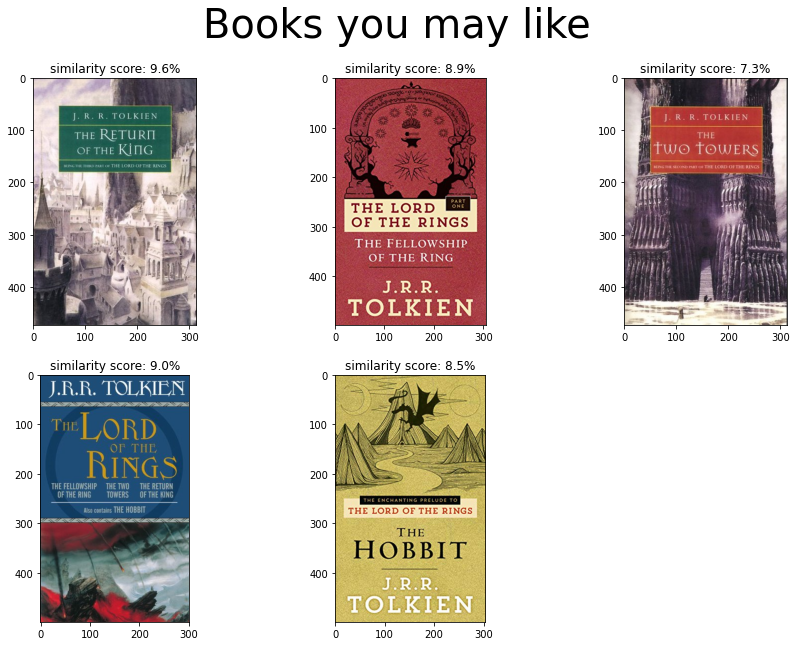

In [275]:
fig = plt.figure(figsize = (15,10))
fig.suptitle('Books you may like',fontsize=40)
i = 0
for image in os.listdir('./books_cover/'):
    image = os.path.join('./books_cover/', image)
    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    ax = fig.add_subplot(2,3,i+1)
    ax.imshow(image)
    ax.set_title('similarity score: {:.1%}'.format(book_recommend['scores'][i]))

    i+=1

plt.show()